Le neurone de Hodgkin-Huxley

Étape 1 : Résolution d'Équations Différentielles avec la Méthode d'Euler

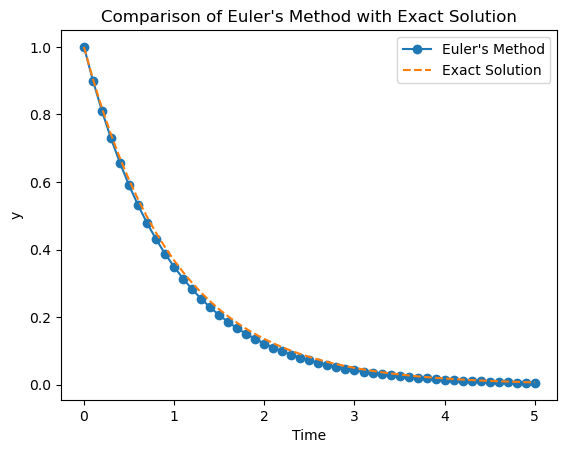

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y0 = 1.0  # Initial condition
k = 1.0   # Decay constant
dt = 0.1  # Time step
T = 5.0   # Total duration

# Initialize variables
time = np.arange(0, T + dt, dt)
y_euler = np.zeros(len(time))
y_exact = np.zeros(len(time))
y_euler[0] = y_exact[0] = y0

# Euler's method integration
for i in range(1, len(time)):
	y_euler[i] = y_euler[i-1] - dt * k * y_euler[i-1]
	y_exact[i] = y0 * np.exp(-k * time[i])
	
# Plot results
plt.plot(time, y_euler, label="Euler's Method", marker='o')
plt.plot(time, y_exact, label="Exact Solution", linestyle='--')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Euler's Method with Exact Solution")
plt.show()

Questions

1-

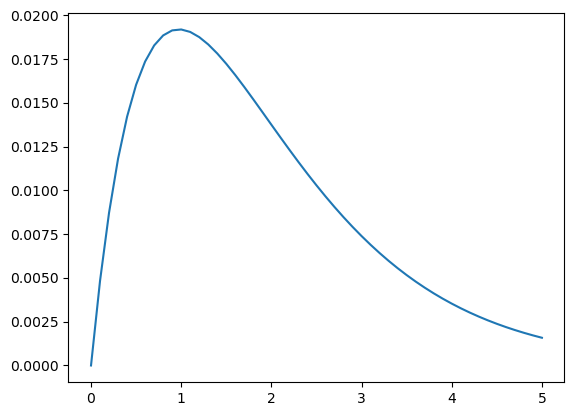

In [60]:
plt.plot(time, np.abs(y_euler - y_exact))

Si Δt est trop grand : la solution diverge ou devient très imprécise.

Si Δt est petit : la solution converge vers la solution exacte mais au prix d’un temps de calcul plus long.

2-

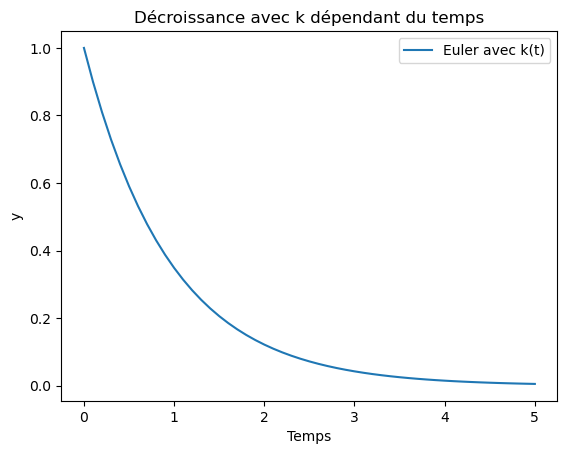

In [61]:

plt.plot(time, y_euler, label="Euler avec k(t)")
plt.xlabel("Temps")
plt.ylabel("y")
plt.title("Décroissance avec k dépendant du temps")
plt.legend()
plt.show()

Étape 2 : Simulation du Modèle de Hodgkin-Huxley

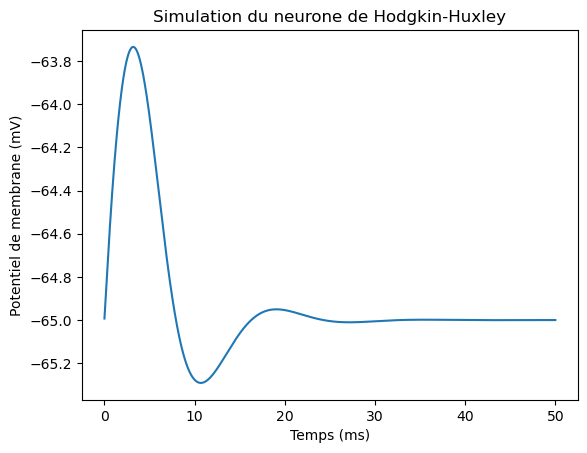

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de Hodgkin-Huxley
Cm = 1.0  # Capacité membranaire (µF/cm^2)
ENa = 50.0  # Potentiel d'inversion du sodium (mV)
EK = -77.0  # Potentiel d'inversion du potassium (mV)
EL = -54.4  # Potentiel d'inversion de fuite (mV)
gNa = 120.0  # Conductance maximale du sodium (mS/cm^2)
gK = 36.0  # Conductance maximale du potassium (mS/cm^2)
gL = 0.3  # Conductance de fuite (mS/cm^2)

# Paramètres de temps
dt = 0.01  # Pas de temps (ms)
T = 50.0  # Temps total (ms)
time = np.arange(0, T, dt)

# Conditions initiales
V = -65.0  # Potentiel de membrane (mV)
n, m, h = 0.3, 0.05, 0.6
I = lambda t: 0.0  # Courant appliqué (µA/cm^2)

# Fonctions pour les taux alpha et beta
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

# Boucle de simulation
V_values = []
for t in time:
    GNa = gNa * m**3 * h
    GK = gK * n**4
    GL = gL

    INa = GNa * (V - ENa)
    IK = GK * (V - EK)
    IL = GL * (V - EL)

    V += dt * (I(t) - (INa + IK + IL)) / Cm
    n += dt * (alpha_n(V) * (1 - n) - beta_n(V) * n)
    m += dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    h += dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)

    V_values.append(V)

# Tracer les résultats
plt.plot(time, V_values)
plt.xlabel('Temps (ms)')
plt.ylabel('Potentiel de membrane (mV)')
plt.title('Simulation du neurone de Hodgkin-Huxley')
plt.show()

Partie I : Potentiel de Membrane

Étape 1 : Simulation du Potentiel de Membrane Passif

1-

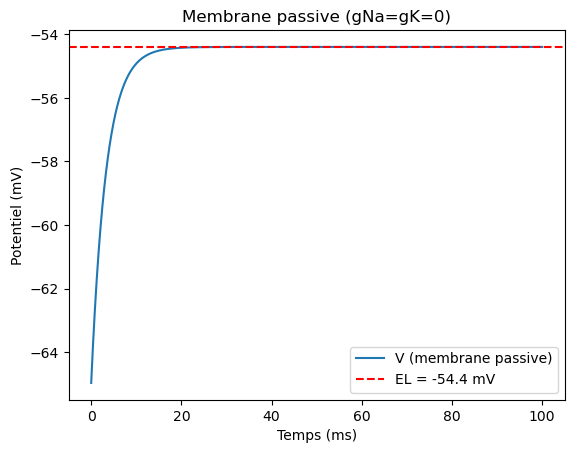

In [63]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
EL = -54.4
gL = 0.3
gNa, gK = 0.0, 0.0

dt = 0.01
T = 100.0
time = np.arange(0, T, dt)

V = -65.0
I = lambda t: 0.0

V_values = []
for t in time:
    IL = gL * (V - EL)
    V += dt * (I(t) - IL) / Cm
    V_values.append(V)

plt.plot(time, V_values, label="V (membrane passive)")
plt.axhline(EL, color='r', linestyle='--', label=f"EL = {EL} mV")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel (mV)")
plt.title("Membrane passive (gNa=gK=0)")
plt.legend()
plt.show()


2-

In [64]:
V_simulated = V_values[-1]
V_theoretical = EL
print(f"Potentiel de repos simulé : {V_simulated:.2f} mV")
print(f"Potentiel de repos théorique : {V_theoretical:.2f} mV")


Potentiel de repos simulé : -54.40 mV
Potentiel de repos théorique : -54.40 mV


3-

In [65]:
tol_mV = 0.1
window_ms = 10.0
window_steps = int(window_ms / dt)

converged_index = None
for i in range(window_steps, len(V_values)):
    window = V_values[i-window_steps:i]
    if (max(window) - min(window)) < tol_mV:
        converged_index = i
        break

if converged_index is not None:
    t_converged = time[converged_index]
    print(f"Stable à t = {t_converged:.2f} ms")
else:
    print("Pas encore stable")

print(f"Valeur finale : {V_values[-1]:.3f} mV ; EL = {EL} mV")


Stable à t = 25.35 ms
Valeur finale : -54.400 mV ; EL = -54.4 mV


Étape 2 : L'Équation de Conductance Parallèle

Question 1 : Calcul du Potentiel de Repos

1-

In [66]:
def Vr(gNa, ENa, gK, EK, gL, EL):
    return (gNa*ENa + gK*EK + gL*EL) / (gNa + gK + gL)

ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3

Vr_calcule = Vr(gNa, ENa, gK, EK, gL, EL)
print(f"{Vr_calcule:.2f} mV")


20.55 mV


2-

In [67]:
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3

Vr_theorique = (gNa*ENa + gK*EK + gL*EL) / (gNa + gK + gL)
print(f"Potentiel de repos théorique Vr = {Vr_theorique:.2f} mV")


Potentiel de repos théorique Vr = 20.55 mV


3-

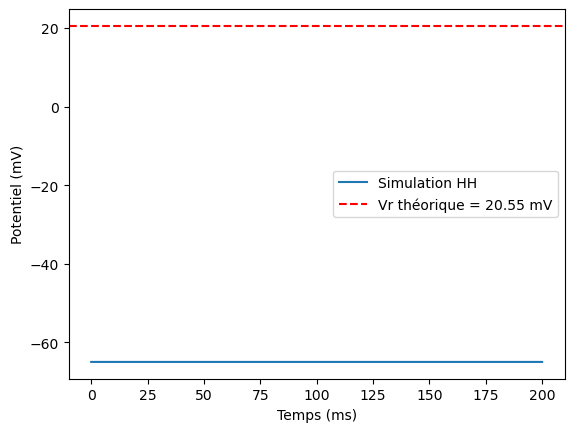

Vr simulé (valeur finale) : -65.00 mV


In [68]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
dt = 0.01
T = 200.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V): return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V): return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V): return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

V_values = []
for t in time:
    GNa = gNa*(m**3)*h
    GK = gK*(n**4)
    GL = gL
    INa = GNa*(V-ENa)
    IK = GK*(V-EK)
    IL = GL*(V-EL)
    V += dt * ( - (INa+IK+IL) )/Cm
    n += dt*(alpha_n(V)*(1-n)-beta_n(V)*n)
    m += dt*(alpha_m(V)*(1-m)-beta_m(V)*m)
    h += dt*(alpha_h(V)*(1-h)-beta_h(V)*h)
    V_values.append(V)

plt.plot(time, V_values, label="Simulation HH")
plt.axhline(Vr_theorique, linestyle='--', color="r", label=f"Vr théorique = {Vr_theorique:.2f} mV")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel (mV)")
plt.legend()
plt.show()

print(f"Vr simulé (valeur finale) : {V_values[-1]:.2f} mV")


Question 2 : Ajustement de la Conductance du Potassium

1-

In [69]:
Vr_target = -45.0
gNa = 0.0
gK_new = gL * (EL - Vr_target) / (Vr_target - EK)
print(f"Nouvelle valeur gK = {gK_new:.4f} mS/cm²")


Nouvelle valeur gK = -0.0881 mS/cm²


2-

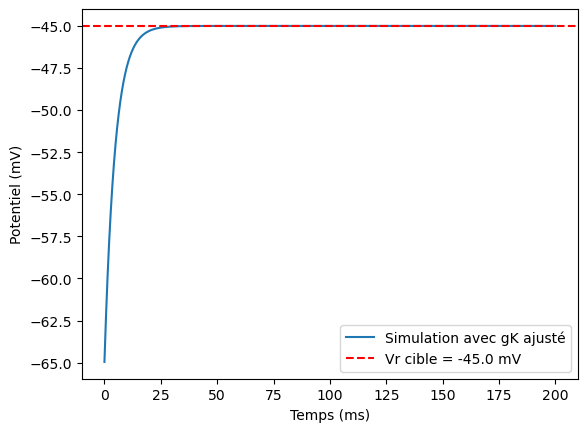

Vr simulé (valeur finale) : -45.00 mV


In [70]:
dt = 0.01
T = 200.0
time = np.arange(0, T, dt)

V = -65.0
V_values = []
for t in time:
    IL = gL*(V-EL)
    IK = gK_new*(V-EK)
    V += dt * ( - (IK+IL) )/Cm
    V_values.append(V)

plt.plot(time, V_values, label="Simulation avec gK ajusté")
plt.axhline(Vr_target, linestyle='--', color="r", label=f"Vr cible = {Vr_target} mV")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel (mV)")
plt.legend()
plt.show()

print(f"Vr simulé (valeur finale) : {V_values[-1]:.2f} mV")


Partie II : Le Potentiel d'Action

Étape 1 : Génération d'un Spike avec Stimulation

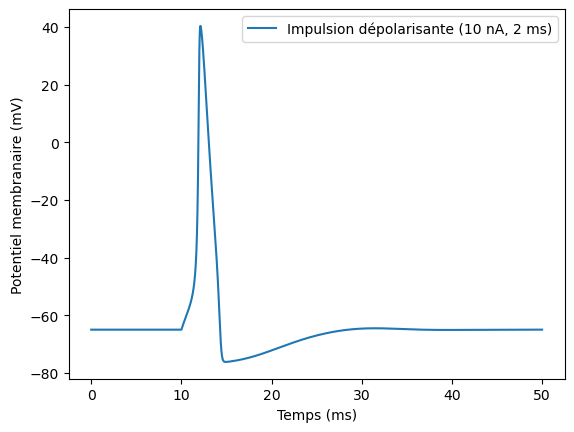

In [71]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3
dt, T = 0.01, 50.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V): return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V): return 4*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V): return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

I = lambda t: 10.0 if 10 < t < 12 else 0.0

V_values = []
for t in time:
    GNa = gNa*m**3*h
    GK = gK*n**4
    GL = gL
    INa = GNa*(V-ENa)
    IK = GK*(V-EK)
    IL = GL*(V-EL)
    V += dt*(I(t)-(INa+IK+IL))/Cm
    n += dt*(alpha_n(V)*(1-n)-beta_n(V)*n)
    m += dt*(alpha_m(V)*(1-m)-beta_m(V)*m)
    h += dt*(alpha_h(V)*(1-h)-beta_h(V)*h)
    V_values.append(V)

plt.plot(time, V_values, label="Impulsion dépolarisante (10 nA, 2 ms)")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.legend()
plt.show()


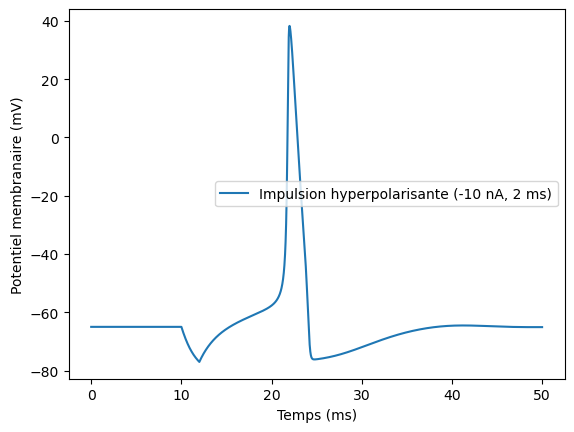

In [72]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3
dt, T = 0.01, 50.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V): return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V): return 4*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V): return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

I = lambda t: -10.0 if 10 < t < 12 else 0.0

V_values = []
for t in time:
    GNa = gNa*m**3*h
    GK = gK*n**4
    GL = gL
    INa = GNa*(V-ENa)
    IK = GK*(V-EK)
    IL = GL*(V-EL)
    V += dt*(I(t)-(INa+IK+IL))/Cm
    n += dt*(alpha_n(V)*(1-n)-beta_n(V)*n)
    m += dt*(alpha_m(V)*(1-m)-beta_m(V)*m)
    h += dt*(alpha_h(V)*(1-h)-beta_h(V)*h)
    V_values.append(V)

plt.plot(time, V_values, label="Impulsion hyperpolarisante (-10 nA, 2 ms)")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.legend()
plt.show()


Question 1 : Pourquoi l'hyperpolarisation provoque-t-elle un spike ?

Hyperpolarisation réactive les canaux sodium.
Quand la cellule revient au repos, ces canaux s’ouvrent et déclenchent un spike.

Étape 2 : Exploration de la Période Réfractaire

In [73]:
# 
I = lambda t: 10.0 if (10 < t < 12) or (17 < t < 19) else 0.0


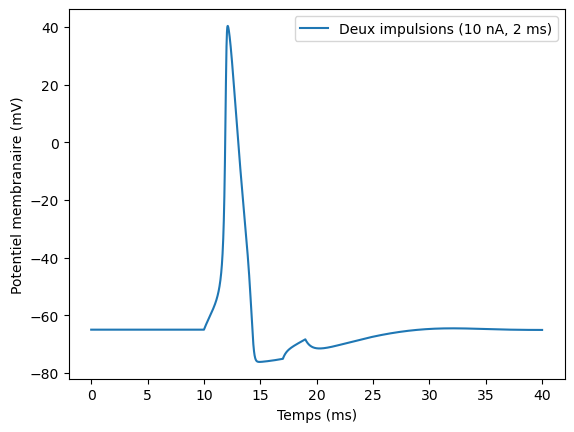

In [74]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3
dt, T = 0.01, 40.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V): return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V): return 4*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V): return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

I = lambda t: 10.0 if (10 < t < 12) or (17 < t < 19) else 0.0

V_values = []
for t in time:
    GNa = gNa*m**3*h
    GK = gK*n**4
    GL = gL
    INa = GNa*(V-ENa)
    IK = GK*(V-EK)
    IL = GL*(V-EL)
    V += dt*(I(t)-(INa+IK+IL))/Cm
    n += dt*(alpha_n(V)*(1-n)-beta_n(V)*n)
    m += dt*(alpha_m(V)*(1-m)-beta_m(V)*m)
    h += dt*(alpha_h(V)*(1-h)-beta_h(V)*h)
    V_values.append(V)

plt.plot(time, V_values, label="Deux impulsions (10 nA, 2 ms)")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.legend()
plt.show()


Question 2 : Pourquoi la deuxième impulsion ne provoque-t-elle pas toujours un spike ?

La 2ᵉ impulsion ne fait pas toujours de spike car les canaux sodium sont encore bloqués après le 1ᵉʳ.
Il faut du temps pour qu’ils se réactivent → c’est la période réfractaire.

Question 3 : Détermination de la Période Réfractaire

Minimal start-to-start delay (ms) that produces 2 spikes: 11.5


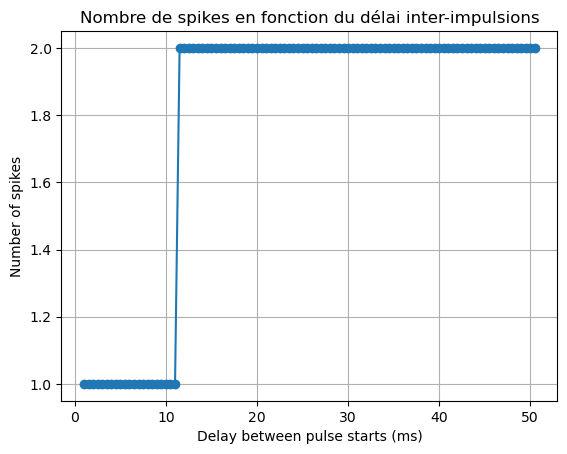

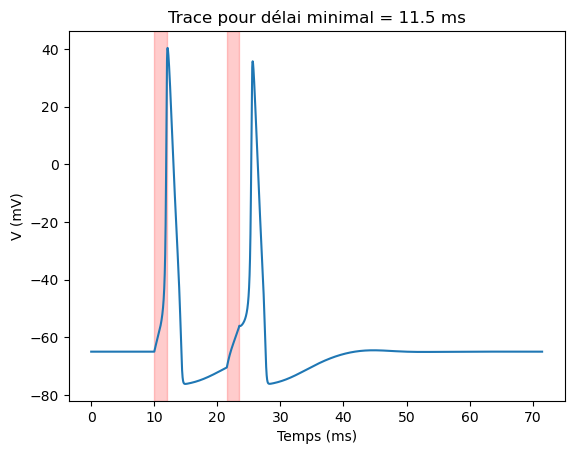

In [75]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3

dt = 0.01
t0 = 10.0   # début 1ère impulsion
pulse_dur = 2.0
Iamp = 10.0

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

def run_sim(delay_start):
    T = t0 + delay_start + 50.0
    time = np.arange(0, T, dt)
    V = -65.0
    n = x_inf(alpha_n(V), beta_n(V))
    m = x_inf(alpha_m(V), beta_m(V))
    h = x_inf(alpha_h(V), beta_h(V))
    V_values = np.zeros(len(time))
    for i, t in enumerate(time):
        I = Iamp if (t0 < t < t0 + pulse_dur) or (t0 + delay_start < t < t0 + delay_start + pulse_dur) else 0.0
        GNa = gNa * m**3 * h
        GK = gK * n**4
        GL = gL
        INa = GNa * (V - ENa)
        IK = GK * (V - EK)
        IL = GL * (V - EL)
        V += dt * (I - (INa + IK + IL)) / Cm
        n += dt * (alpha_n(V)*(1-n) - beta_n(V)*n)
        m += dt * (alpha_m(V)*(1-m) - beta_m(V)*m)
        h += dt * (alpha_h(V)*(1-h) - beta_h(V)*h)
        V_values[i] = V
    return time, V_values

def count_spikes(time, V):
    spikes = []
    for i in range(1, len(V)-1):
        if V[i] > 0 and V[i] > V[i-1] and V[i] >= V[i+1]:
            spikes.append(time[i])
    return len(spikes), spikes

delays = np.arange(1.0, 51.0, 0.5)  # ms, start-to-start delay sweep
spike_counts = []
first_success = None

for d in delays:
    time, V = run_sim(d)
    n_spikes, spikes = count_spikes(time, V)
    spike_counts.append(n_spikes)
    if first_success is None and n_spikes >= 2:
        first_success = d

print("Minimal start-to-start delay (ms) that produces 2 spikes:", first_success)

plt.figure()
plt.plot(delays, spike_counts, marker='o')
plt.xlabel("Delay between pulse starts (ms)")
plt.ylabel("Number of spikes")
plt.title("Nombre de spikes en fonction du délai inter-impulsions")
plt.grid(True)
plt.show()

# Tracer la simulation pour le délai minimal si trouvée
if first_success is not None:
    time, V = run_sim(first_success)
    plt.figure()
    plt.plot(time, V)
    plt.axvspan(t0, t0+pulse_dur, color='red', alpha=0.2)
    plt.axvspan(t0+first_success, t0+first_success+pulse_dur, color='red', alpha=0.2)
    plt.xlabel("Temps (ms)")
    plt.ylabel("V (mV)")
    plt.title(f"Trace pour délai minimal = {first_success} ms")
    plt.show()


Étape 3 : Effet d'un Stimulus Opposé

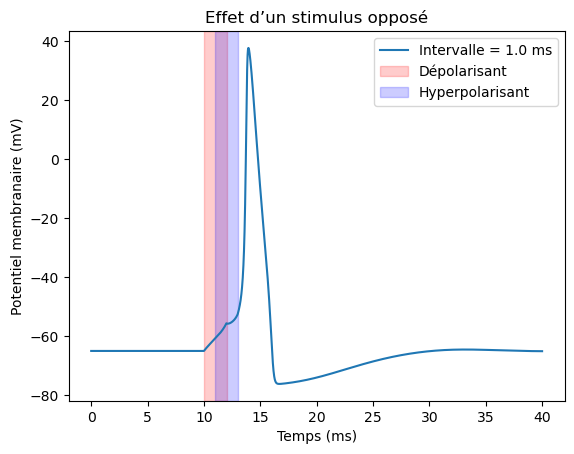

In [76]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3
dt, T = 0.01, 40.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

def run_sim(interval):
    V = -65.0
    n = x_inf(alpha_n(V), beta_n(V))
    m = x_inf(alpha_m(V), beta_m(V))
    h = x_inf(alpha_h(V), beta_h(V))
    V_values = []

    for t in time:
        if 10 < t < 12:
            I = 5.0
        elif (10+interval) < t < (12+interval):
            I = -5.0
        else:
            I = 0.0

        GNa = gNa * m**3 * h
        GK = gK * n**4
        GL = gL
        INa = GNa * (V - ENa)
        IK = GK * (V - EK)
        IL = GL * (V - EL)
        V += dt * (I - (INa + IK + IL)) / Cm
        n += dt * (alpha_n(V)*(1-n) - beta_n(V)*n)
        m += dt * (alpha_m(V)*(1-m) - beta_m(V)*m)
        h += dt * (alpha_h(V)*(1-h) - beta_h(V)*h)
        V_values.append(V)

    return V_values

# Test avec intervalle = 1 ms
interval = 1.0
V_values = run_sim(interval)

plt.plot(time, V_values, label=f"Intervalle = {interval} ms")
plt.axvspan(10, 12, color="red", alpha=0.2, label="Dépolarisant")
plt.axvspan(10+interval, 12+interval, color="blue", alpha=0.2, label="Hyperpolarisant")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.legend()
plt.title("Effet d’un stimulus opposé")
plt.show()


Question 4 : Quel est le délai le plus long après une impulsion positive de 5 nA auquel une impulsion négative de 5 nA peut encore empêcher un spike ?

In [77]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa, gK, gL = 120.0, 36.0, 0.3
dt = 0.01
t0 = 10.0
pulse_dur = 2.0
Iamp = 5.0

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

def run_sim(interval, both_pulses=True, T=60.0):
    time = np.arange(0, T, dt)
    V = -65.0
    n = x_inf(alpha_n(V), beta_n(V))
    m = x_inf(alpha_m(V), beta_m(V))
    h = x_inf(alpha_h(V), beta_h(V))
    Vv = np.zeros(len(time))
    for i,t in enumerate(time):
        if both_pulses:
            I = Iamp if (t0 < t < t0+pulse_dur) else (-Iamp if (t0+interval < t < t0+interval+pulse_dur) else 0.0)
        else:
            I = Iamp if (t0 < t < t0+pulse_dur) else 0.0
        GNa = gNa*m**3*h
        GK = gK*n**4
        GL = gL
        INa = GNa*(V-ENa)
        IK = GK*(V-EK)
        IL = GL*(V-EL)
        V += dt * (I - (INa+IK+IL)) / Cm
        n += dt*(alpha_n(V)*(1-n)-beta_n(V)*n)
        m += dt*(alpha_m(V)*(1-m)-beta_m(V)*m)
        h += dt*(alpha_h(V)*(1-h)-beta_h(V)*h)
        Vv[i] = V
    return time, Vv

def count_spikes(V, time):
    thr = 0.0
    spikes = 0
    for i in range(1, len(V)-1):
        if V[i] > thr and V[i] > V[i-1] and V[i] >= V[i+1]:
            spikes += 1
    return spikes

time0, V_only = run_sim(0.0, both_pulses=False)
baseline_spikes = count_spikes(V_only, time0)
if baseline_spikes == 0:
    print("La pulsation dépolarisante seule ne produit pas de spike ; augmenter Iamp ou durée.")
else:
    intervals = np.arange(0.0, 10.01, 0.1)
    suppressed_intervals = []
    for inter in intervals:
        time_both, V_both = run_sim(inter, both_pulses=True)
        spikes_both = count_spikes(V_both, time_both)
        if spikes_both < baseline_spikes:
            suppressed_intervals.append(inter)
    if len(suppressed_intervals) == 0:
        print("Aucun intervalle testé n'empêche le spike.")
    else:
        critical_delay = max(suppressed_intervals)
        print(f"Délai critique maximal qui empêche le spike : {critical_delay:.2f} ms")
        time_plot, V_plot = run_sim(critical_delay, both_pulses=True)
        plt.plot(time_plot, V_plot)
        plt.axvspan(t0, t0+pulse_dur, color='red', alpha=0.2)
        plt.axvspan(t0+critical_delay, t0+critical_delay+pulse_dur, color='blue', alpha=0.2)
        plt.xlabel("Temps (ms)")
        plt.ylabel("V (mV)")
        plt.title(f"Trace pour délai critique = {critical_delay:.2f} ms")
        plt.show()


Aucun intervalle testé n'empêche le spike.


Partie III : Le Canal Sodium Rapide

Étape 1 : Observer les Variables de Gating du Canal Sodium

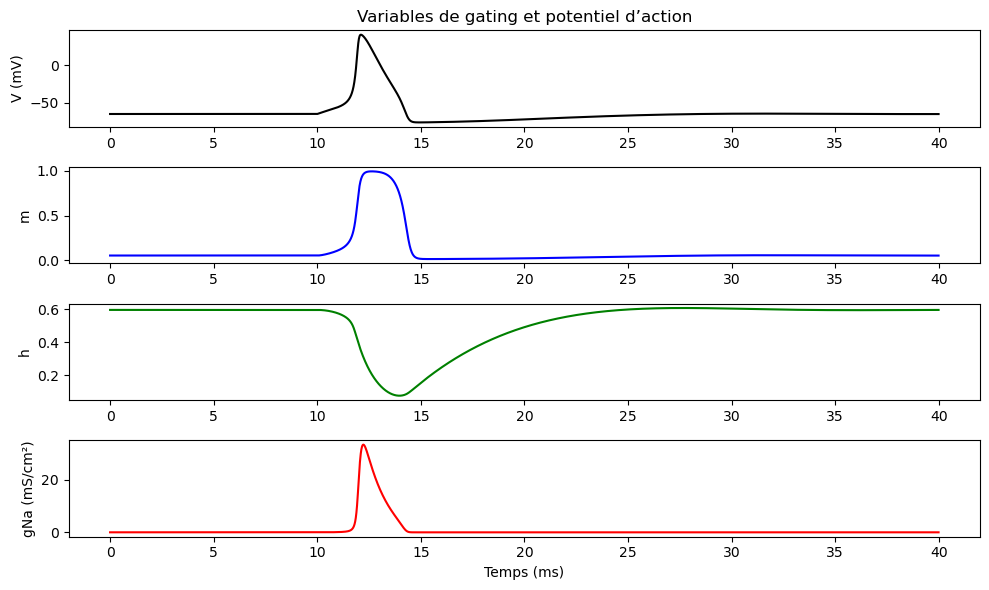

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa_max, gK, gL = 120.0, 36.0, 0.3
dt, T = 0.01, 40.0
time = np.arange(0, T, dt)

# Fonctions alpha et beta
def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

# Courant appliqué
I = lambda t: 10.0 if 10 < t < 12 else 0.0

# Conditions initiales
V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

# Stockage
V_values, m_values, h_values, gNa_values = [], [], [], []

for t in time:
    GNa = gNa_max * (m**3) * h
    GK = gK * (n**4)
    GL = gL

    INa = GNa * (V - ENa)
    IK = GK * (V - EK)
    IL = GL * (V - EL)

    V += dt * (I(t) - (INa + IK + IL)) / Cm
    n += dt * (alpha_n(V)*(1-n) - beta_n(V)*n)
    m += dt * (alpha_m(V)*(1-m) - beta_m(V)*m)
    h += dt * (alpha_h(V)*(1-h) - beta_h(V)*h)

    V_values.append(V)
    m_values.append(m)
    h_values.append(h)
    gNa_values.append(GNa)

# Tracés
plt.figure(figsize=(10,6))

plt.subplot(4,1,1)
plt.plot(time, V_values, 'k')
plt.ylabel("V (mV)")
plt.title("Variables de gating et potentiel d’action")

plt.subplot(4,1,2)
plt.plot(time, m_values, 'b')
plt.ylabel("m")

plt.subplot(4,1,3)
plt.plot(time, h_values, 'g')
plt.ylabel("h")

plt.subplot(4,1,4)
plt.plot(time, gNa_values, 'r')
plt.ylabel("gNa (mS/cm²)")
plt.xlabel("Temps (ms)")

plt.tight_layout()
plt.show()


Étape 2 : Désactiver le Canal Potassium

In [79]:
GK = 0  # Disable potassium conductance


Potentiel final (simulation) ≈ -0.63 mV


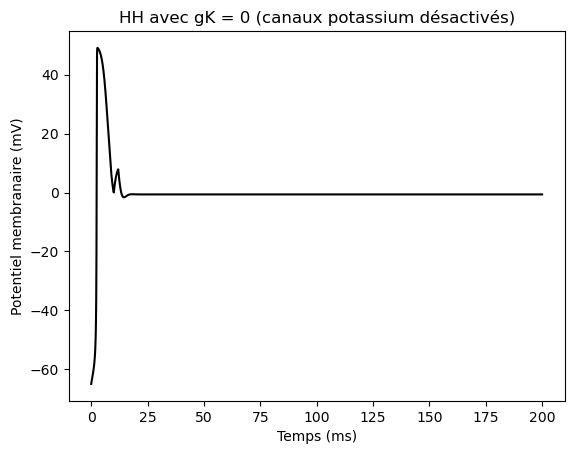

In [80]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa_max, gK, gL = 120.0, 0.0, 0.3  # gK désactivé
dt, T = 0.01, 200.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def x_inf(alpha,beta): return alpha/(alpha+beta)

I = lambda t: 10.0 if 10 < t < 12 else 0.0  # petit stimulus

V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

Vv, gNa_v = [], []

for t in time:
    GNa = gNa_max * (m**3) * h
    GL = gL
    INa = GNa * (V - ENa)
    IK = 0.0  # pas de potassium
    IL = GL * (V - EL)
    V += dt * (I(t) - (INa + IK + IL)) / Cm
    n += dt * (alpha_n(V)*(1-n) - beta_n(V)*n)
    m += dt * (alpha_m(V)*(1-m) - beta_m(V)*m)
    h += dt * (alpha_h(V)*(1-h) - beta_h(V)*h)
    Vv.append(V); gNa_v.append(GNa)

print(f"Potentiel final (simulation) ≈ {Vv[-1]:.2f} mV")

plt.plot(time, Vv, 'k')
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.title("HH avec gK = 0 (canaux potassium désactivés)")
plt.show()


Question 1 :

In [81]:
import numpy as np

ENa, EL = 50.0, -54.4
gL = 0.3
GNa_final = gNa_max * (m_values[-1]**3) * h_values[-1]  # remplacer par les valeurs issues de la simulation
V_eq = (GNa_final*ENa + gL*EL) / (GNa_final + gL)
print(f"{V_eq:.2f} mV")


-50.95 mV


Question 2 :

In [82]:
ENa, EL = 50.0, -54.4
gL = 0.3
Vr = 0.0  # exemple : tension de repos observée après le spike

GNa = gL * (Vr - EL) / (ENa - Vr)
print(f"Conductance sodium effective GNa ≈ {GNa:.4f} mS/cm²")


Conductance sodium effective GNa ≈ 0.3264 mS/cm²


Question 3 :

Spikes détectés aux (ms): [  2.78  11.99 105.22]
Valeur de h juste avant second stimulus: 0.0028831393399258937
GNa juste avant second stimulus: 0.31857862911526585


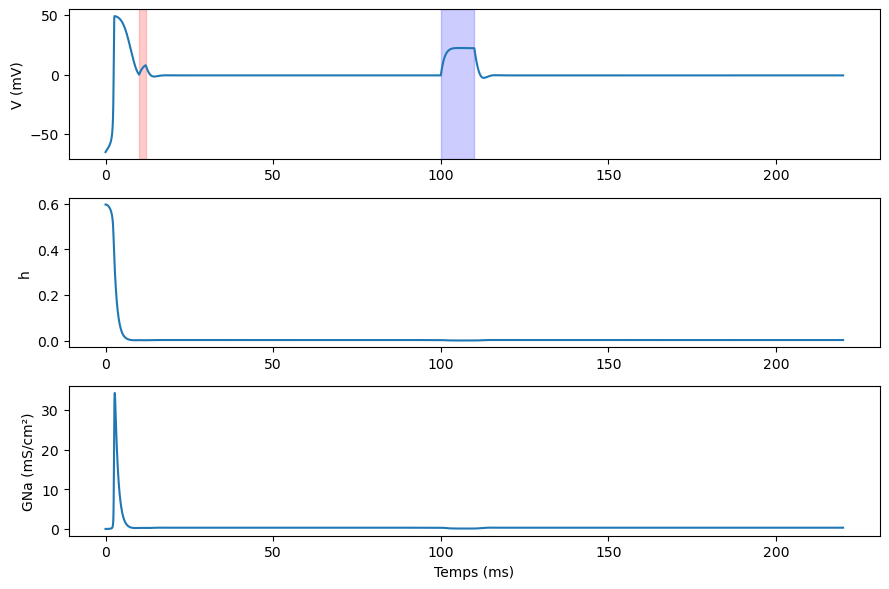

In [83]:
import numpy as np
import matplotlib.pyplot as plt

Cm = 1.0
ENa, EK, EL = 50.0, -77.0, -54.4
gNa_max, gK, gL = 120.0, 0.0, 0.3
dt, T = 0.01, 220.0
time = np.arange(0, T, dt)

def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4.0*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def x_inf(a,b): return a/(a+b)

V = -65.0
n = x_inf(alpha_n(V), beta_n(V))
m = x_inf(alpha_m(V), beta_m(V))
h = x_inf(alpha_h(V), beta_h(V))

t1_start, t1_dur = 10.0, 2.0
t2_start, t2_dur = 100.0, 10.0

Vv, mv, hv, Gna_v = [], [], [], []

for t in time:
    I = 10.0 if (t1_start < t < t1_start+t1_dur) else (20.0 if (t2_start < t < t2_start+t2_dur) else 0.0)
    GNa = gNa_max * (m**3) * h
    IK = gK * (n**4) * (V - EK)
    INa = GNa * (V - ENa)
    IL = gL * (V - EL)
    V += dt * (I - (INa + IK + IL)) / Cm
    n += dt * (alpha_n(V)*(1-n) - beta_n(V)*n)
    m += dt * (alpha_m(V)*(1-m) - beta_m(V)*m)
    h += dt * (alpha_h(V)*(1-h) - beta_h(V)*h)
    Vv.append(V); mv.append(m); hv.append(h); Gna_v.append(GNa)

def count_spikes(V, time, thr=0.0):
    spikes = []
    for i in range(1, len(V)-1):
        if V[i] > thr and V[i] > V[i-1] and V[i] >= V[i+1]:
            spikes.append(time[i])
    return spikes

spikes = count_spikes(Vv, time)
print("Spikes détectés aux (ms):", np.round(spikes,2))
print("Valeur de h juste avant second stimulus:", hv[int((t2_start-1.0)/dt)])
print("GNa juste avant second stimulus:", Gna_v[int((t2_start-1.0)/dt)])

plt.figure(figsize=(9,6))
plt.subplot(3,1,1); plt.plot(time, Vv); plt.axvspan(t1_start,t1_start+t1_dur,color='red',alpha=0.2); plt.axvspan(t2_start,t2_start+t2_dur,color='blue',alpha=0.2); plt.ylabel("V (mV)")
plt.subplot(3,1,2); plt.plot(time, hv); plt.ylabel("h")
plt.subplot(3,1,3); plt.plot(time, Gna_v); plt.ylabel("GNa (mS/cm²)"); plt.xlabel("Temps (ms)")
plt.tight_layout(); plt.show()


Même avec un second stimulus fort, il n’y a pas de spike car :

La variable h est très basse → les canaux sodium sont inactivés.

Donc la conductance sodium reste trop faible.

Pas assez de Na⁺ peut entrer → la cellule ne peut pas repartir en potentiel d’action.

le neurone est bloqué dépolarisé car les canaux sodium ne se sont pas encore réactivés.